In [1]:
import pandas as pd
import regex as re

ModuleNotFoundError: No module named 'regex'

In [ ]:
import_dataframe = pd.read_pickle('working_files/master_dataframe_with_models')

Importing only E-450s here as a test case.

Filtering out the records that will not have tables. Based on EDA, we know that these records will contain the string 'Contains No Recorded Data'.

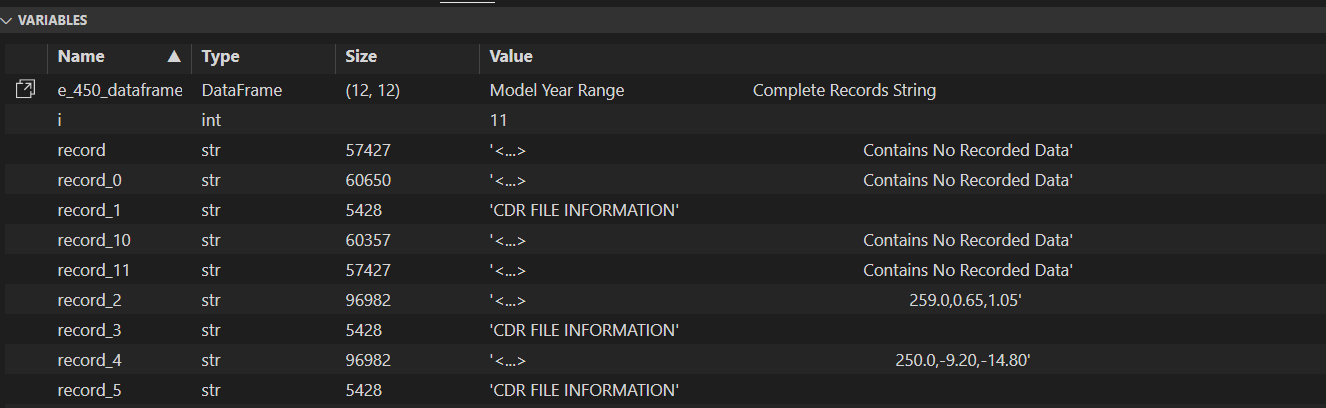

In [ ]:
contains_no_data_string = 'NONE            '
contains_string = import_dataframe['Complete Records String'].str.contains('Contains No Recorded Data|' + contains_no_data_string)

records_dataframe = import_dataframe[~contains_string]

In [ ]:
e_450_test_record = records_dataframe.iloc[0, 3]

transit_150_test_record = records_dataframe.iloc[2, 3]

ram_1500_test_record = records_dataframe.iloc[3, 3]

silverado_1500_test_record = records_dataframe.iloc[4, 3]

Based on EDA of that cell, we have the following table labels. We can design a filter based on these.

PRE-CRASH DATA -5 TO 0 SEC [2 SAMPLES/SEC] (FIRST RECORD)

    Times (sec),"Speed, vehicle indicated MPH","Accelerator pedal, % full","Service brake, on/off",Engine RPM,"ABS activity (engaged, non-engaged)","Stability control (engaged, non-engaged)","Traction Control via Brakes (engaged, non-engaged)","Traction Control via Engine (engaged, non-engaged)"

PRE-CRASH DATA -5 TO 0 SEC [10 SAMPLES/SEC] (FIRST RECORD)

    Times (sec),      Steering Wheel Angle (degrees)

LONGITUDINAL CRASH PULSE (FIRST RECORD)
    
    Time (msec),"Delta-V, longitudinal (MPH)","Delta-V, longitudinal (km/h)"

LATERAL CRASH PULSE (FIRST RECORD)

    Time (msec),"Delta-V, lateral (MPH)","Delta-V, lateral (km/h)"

#above information is bounded by this string, or an empty row.
SYSTEM STATUS AT EVENT (SECOND RECORD)


#Extrapolating from here, let's assume the following: Successive records will say 'SECOND' 'THIRD' 'FOURTH' etc instead of FIRST

Following typical schema design hygiene, let's extract these tables in flat format and append them to variables in the main dataframe.

In [ ]:
# create the regular expression for pre-crash data
e_450_pre_crash_data_pattern = r"PRE-CRASH DATA -5 TO 0 SEC \[2 SAMPLES/SEC\] \(FIRST RECORD\)(.*?)PRE-CRASH DATA -5 TO 0 SEC \[10 SAMPLES/SEC\] \(FIRST RECORD\)"
silverado_1500_data_pattern = r"PRE-CRASH DATA -5.0 TO -0.5 SEC \(RECORD 1\)"
transit_150_data_pattern = r"PRE-CRASH DATA -5 TO 0 SEC \[2 SAMPLES/SEC\] \(FIRST RECORD\)"
ram_1500_data_pattern = r"PRE_CRASH DATA \(MOST RECENT EVENT\)"
combined_search_pattern = f"{e_450_pre_crash_data_pattern}|{silverado_1500_data_pattern}|{transit_150_data_pattern}|{ram_1500_data_pattern}"

# loop through each row in the DataFrame
for index, row in records_dataframe.iterrows():
    # get the string containing the complete record
    data = row['Complete Records String']

    # extract the pre-crash data using the regular expression
    pre_crash_data = re.search(combined_search_pattern, data, re.DOTALL)
    if pre_crash_data:
        # store the pre-crash data in the 'Pre-Crash Data' column of the DataFrame
        records_dataframe.at[index, 'Pre-Crash Data'] = pre_crash_data.group(1)
    else:
        # if no pre-crash data was found, set the value to NaN
        records_dataframe.at[index, 'Pre-Crash Data'] = pd.NaT


In [ ]:
records_dataframe

,Model,Year Range,Complete Records String,Complete Records,VIN,User,Case Number,EDR Data Imaging Date,Filename,Saved On,Imaged with CDR Version:,Reported with CDR Version:,Pre-Crash Data
2,E-450,2004-2022,...,Complet...,1FDXE4FS4BDA50634,M. Mikhailov,02596301-2022,04/29/2022,None,"Friday, April 29 2022 at 13:07:54",Crash Data Retrieval Tool 21.4,Crash Data Retrieval Tool 21.5,"\nTimes (sec),""Speed, vehicle indicated MPH"",""..."
4,E-450,2004-2022,...,Complet...,1FDXE4FSXCDA06364,SP,866715-2017,08/07/2017,None,"Monday, August 7 2017 at 12:13:58",Crash Data Retrieval Tool 17.4,Crash Data Retrieval Tool 23.0,"\nTimes (sec),""Speed, vehicle indicated MPH"",""..."
6,Transit-150,2015-2022,...,Complet...,1FTNR1ZM1FKB19874,SP,685630-2015,11/03/2015,1FTNR1ZM1FKB19874_ACM.CDRX,None,Crash Data Retrieval Tool 16.1,Crash Data Retrieval Tool 21.5,"\nTimes (sec),""Speed, Vehicle Indicated (km/h)..."
12,Savana 3500,2010-2022,...,Complete...,1GDY7RFF2G1901028,M. Mikhailov,02464402-2021,12/06/2021,1GDY7RFF2G1901028_ACM.CDRX,"Monday, December 6 2021 at 14:48:04",Crash Data Retrieval Tool 21.3,Crash Data Retrieval Tool 21.5,NaT
14,Sierra 1500,2009-2022,...,Complete...,1GTN1LEC8JZ905641,M. Mikhailov,01144564-2018,12/03/2018,1GTN1LEC8JZ905641_ACM.CDRX,"Monday, December 3 2018 at 14:07:03",Crash Data Retrieval Tool 17.9,Crash Data Retrieval Tool 21.5,NaT
15,Sierra 1500,2009-2022,...,Complete...,1GTN1LECXHZ906736,Wade Bartlett,None,12/01/2017,None,"Friday, December 1 2017 at 07:54:41",Crash Data Retrieval Tool 17.5,Crash Data Retrieval Tool 21.5,NaT
17,1500,2013-2022,...,Complet...,3C6JR6DT3KG546976,M. Mikhailov,01869039-2020,07/24/2020,3C6JR6DT3KG546976_ACM.CDRX,"Friday, July 24 2020 at 14:26:34",Crash Data Retrieval Tool 19.4,Crash Data Retrieval Tool 21.5,NaT
19,Silverado 1500,2019-2022,...,Complet...,3GCNWAEF5LG293370,M. Mikhailov,02083717-2020,01/27/2021,3GCNWAEF5LG293370_ACM.CDRX,None,Crash Data Retrieval Tool 21.0,Crash Data Retrieval Tool 21.5,None
20,Silverado 1500,2019-2022,...,Complet...,3GCNWAEF5LG401485,M. Mikhailov,02146598-2021,03/29/2021,3GCNWAEF5LG401485_ACM.CDRX,"Monday, March 29 2021 at 13:56:50",Crash Data Retrieval Tool 21.0,Crash Data Retrieval Tool 21.5,None
24,None,None,...,Complete Record 0 Claim ...,None,None,None,10/31/2018,None,None,None,None,NaT


In [ ]:
pd.to_pickle(records_dataframe, 'records_dataframe.pkl')